<a href="https://colab.research.google.com/github/Taejin1221/MachineLearning/blob/master/TrajectoryAugmentation%20AutoEncoder_DNN(MNIST%2C6layers%2CReLU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape( ( len( x_train ), np.prod( x_train.shape[1:] ) ) )
x_test = x_test.reshape( ( len( x_test ), np.prod( x_test.shape[1:] ) ) )

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [3]:
# hyper parameters
n_input = 784
n_hidden1 = 128
n_hidden2 = 64
n_hidden3 = 32

n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_output = n_input

In [4]:
# model = keras.Sequential()
# model.add( layers.Dense( n_input, 'relu', input_shape = ( 784, ), name = 'Encoder' ) )
# model.add( layers.Dense( n_hidden1, 'relu', name = 'Hidden1' ) )
# model.add( layers.Dense( n_hidden2, 'relu', name = 'Hidden2' ) )
# model.add( layers.Dense( n_hidden3, 'relu', name = 'Hidden3' ) )
# model.add( layers.Dense( n_output, 'sigmoid', name = 'Decoder' ) )

In [4]:
input = layers.Input( shape = ( n_input, ) )
encoded = layers.Dense( n_hidden1, 'relu' )( input )
encoded = layers.Dense( n_hidden2, 'relu' )( encoded )
encoded = layers.Dense( n_hidden3, 'relu' )( encoded )

decoded = layers.Dense( n_hidden4, 'relu' )( encoded )
decoded = layers.Dense( n_hidden5, 'relu' )( decoded )
output = layers.Dense( n_output, 'sigmoid' )( decoded )

In [5]:
model = keras.models.Model( input, output )

In [6]:
model.compile( optimizer = 'adadelta', loss = 'binary_crossentropy' )
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)              

In [7]:
model.fit( x_train, x_train,
    epochs = 100, batch_size = 256, shuffle = True )

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6935
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6934
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6934
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6933
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6932
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6931
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6930
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6929
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6928
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6927
Epoch 11/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6926
Epoch 12/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6925
Epoch 13/100


In [9]:
# n_test_digits = 2

# outputs_val = model.predict( x_test[:2] )
# fig = plt.figure(figsize=(10, 4))
# for digit_index in range(n_test_digits):
#     plt.subplot( n_test_digits, 2, digit_index * 2 + 1 )
#     plt.imshow( tf.reshape( x_test[digit_index], [28, 28] ), cmap = "Greys", interpolation="nearest" )

#     plt.subplot( n_test_digits, 2, digit_index * 2 + 2 )
#     plt.imshow( tf.reshape( outputs_val[digit_index], [28, 28] ), cmap = "Greys", interpolation="nearest")

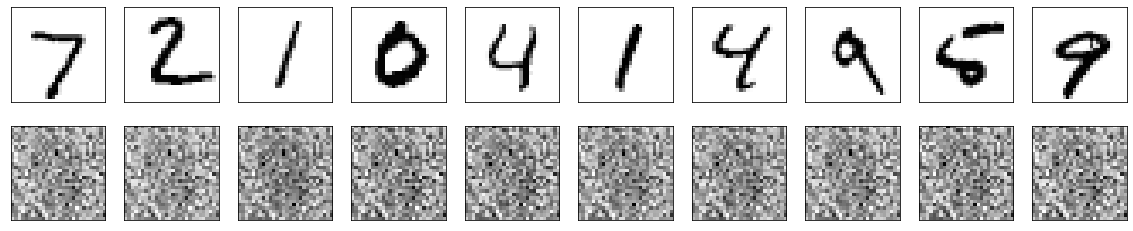

In [8]:
decoded_imgs = model.predict( x_test )

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Image
    ax = plt.subplot( 2, n, i + 1 )
    plt.imshow( x_test[i].reshape( 28, 28 ), cmap = 'Greys' )
    ax.get_xaxis().set_visible( False )
    ax.get_yaxis().set_visible( False )

    # 재구성된 데이터
    ax = plt.subplot( 2, n, i + 1 + n )
    plt.imshow( decoded_imgs[i].reshape( 28, 28 ), cmap = 'Greys' )
    ax.get_xaxis().set_visible( False )
    ax.get_yaxis().set_visible( False )
plt.show()